In [1]:
# Calculating heatwaves for Resiliency
import matplotlib.pyplot as plt
#import intake_esgf
import matplotlib as mpl
import pandas as pd
import xarray as xr
import numpy as np

In [2]:

#from datatree import DataTree

# Set the matplotlib default font size
mpl.rcParams['font.size'] = 16

In [3]:
# Read coordinates
df= pd.read_csv('railonly.csv')

In [4]:
df

,Unnamed: 0,dms_mode,dms_orig_string,dms_dest_string,tons_2017,tons_2018,tons_2019,tons_2020,tons_2021,tons_2022,tons_2025,tons_2030,tons_2035,tons_2040,tons_2045,tons_2050,dms_orig_coordinates,dms_dest_coordinates,distance_miles,path
0,1635,Rail,Albany NY CFS Area,Albany NY CFS Area,2.151089,2.129259,2.029196,1.916540,2.038797,1.878167,3.134651,3.790910,4.533992,5.379749,6.368823,7.463871,"(-73.754968, 42.6511674)","(-73.754968, 42.6511674)",0.000000,"[(-73.75858106853033, 42.635454595758475)]"
1,1636,Rail,Albany NY CFS Area,Buffalo NY CFS Area,3.284010,3.520622,3.284021,2.672125,3.044126,3.221475,2.695342,2.512051,2.331322,2.156351,1.989575,1.821083,"(-73.754968, 42.6511674)","(-78.8783922, 42.8867166)",296.096889,"[(-73.75858106853033, 42.635454595758475), (-7..."
2,1637,Rail,Albany NY CFS Area,Chicago IL-IN-WI (IN Part),6.951653,7.110767,6.815517,6.812078,6.667921,6.491779,6.441755,6.518915,6.411717,6.588118,6.855076,7.105745,"(-73.754968, 42.6511674)","(-87.6244212, 41.8755616)",809.697277,"[(-73.75858106853033, 42.635454595758475), (-7..."
3,1638,Rail,Albany NY CFS Area,Los Angeles CA,5.005863,5.120441,4.907832,4.905355,4.801548,4.674710,5.197703,5.403830,5.448775,5.732618,6.135413,6.496954,"(-73.754968, 42.6511674)","(-118.242766, 34.0536909)",2903.364833,"[(-73.75858106853033, 42.635454595758475), (-7..."
4,1639,Rail,Albany NY CFS Area,New Orleans LA-MS (LA Part),73.983521,73.092394,73.074641,73.282022,87.103521,74.473165,62.204445,63.235298,64.843910,66.112679,67.183281,68.491730,"(-73.754968, 42.6511674)","(-90.0782127, 29.9759983)",1485.113593,"[(-73.75858106853033, 42.635454595758475), (-7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,4250,Rail,Wyoming,St. Louis MO-IL (MO Part),11739.404297,11372.126204,10488.403412,8111.169147,8804.391701,9041.629845,6311.933100,5042.578600,3861.043200,2922.885000,2206.542500,2503.819300,"(-107.568534, 43.1700264)","(-90.1910154, 38.6280278)",1083.816850,"[(-107.59679538266532, 43.278198444985), (-107..."
982,4251,Rail,Wyoming,Tucson AZ,995.066772,963.935190,889.028222,687.526786,746.286388,766.395398,536.016720,428.363370,328.284550,248.699780,187.930530,213.427510,"(-107.568534, 43.1700264)","(-110.974847, 32.2228765)",1331.570635,"[(-107.59679538266532, 43.278198444985), (-107..."
983,4252,Rail,Wyoming,Tulsa OK,3870.874794,3751.455731,3462.355241,2690.467961,2918.870038,2989.532490,2144.854930,1755.463330,1398.387700,1123.995620,927.788750,1061.827340,"(-107.568534, 43.1700264)","(-95.9927516, 36.1563122)",988.000793,"[(-107.59679538266532, 43.278198444985), (-107..."
984,4253,Rail,Wyoming,Wichita KS,0.020017,0.019391,0.017884,0.013830,0.015012,0.015417,0.010783,0.008617,0.006604,0.005003,0.003780,0.004293,"(-107.568534, 43.1700264)","(-97.3375448, 37.6922361)",805.154365,"[(-107.59679538266532, 43.278198444985), (-107..."


In [5]:
df_nodes = df[['dms_orig_string','dms_orig_coordinates']].drop_duplicates()
# Separate into latitude and longitude columns
df_nodes[['longitude', 'latitude']] = df_nodes['dms_orig_coordinates'].str.extract(r'\((-?\d+\.\d+),\s*(-?\d+\.\d+)\)')
# Convert columns to numeric if needed
df_nodes['longitude'] = pd.to_numeric(df_nodes['longitude'])
df_nodes['latitude'] = pd.to_numeric(df_nodes['latitude'])
# Convert negative longitudes to 0-360 range
df_nodes['longitude'] = df_nodes['longitude'] % 360
# Reset the index
df_nodes = df_nodes.reset_index(drop=True)
df_nodes

,dms_orig_string,dms_orig_coordinates,longitude,latitude
0,Albany NY CFS Area,"(-73.754968, 42.6511674)",286.245032,42.651167
1,Atlanta GA,"(-84.3902644, 33.7489924)",275.609736,33.748992
2,Austin TX,"(-97.7436995, 30.2711286)",262.256301,30.271129
3,Baltimore MD,"(-76.610759, 39.2908816)",283.389241,39.290882
4,Baton Rouge LA,"(-82.502277, 28.2968872)",277.497723,28.296887
...,...,...,...,...
77,Virginia Beach-Norfolk VA-NC (VA Part),"(-76.2863999, 36.8448348)",283.713600,36.844835
78,Washington DC-VA-MD-WV (MD Part),"(-77.0365427, 38.8950368)",282.963457,38.895037
79,Washington DC-VA-MD-WV (VA Part),"(-77.0365427, 38.8950368)",282.963457,38.895037
80,Wichita KS,"(-97.3375448, 37.6922361)",262.662455,37.692236


## Inputs

| Model 1         | Model 2         | Model 3        | Model 4           | Model 5         |
|-----------------|-----------------|----------------|--------------------|-----------------|
| ACCESS-CM2      | AWI-CM-1-1-MR   | CanESM5        | CNRM-CM6-1         | CNRM-ESM2-1     |
| EC-Earth3-Veg   | GFDL-CM4        | HadGEM3-GC31-LL| INM-CM4-8          | IPSL-CM6A-LR    |
| MIROC6          | MPI-ESM1-2-HR   | MRI-ESM2-0     | NorESM2-MM         | TaiESM1         |
| ACCESS-ESM1-5   | BCC-CSM2-MR     | CESM2-LENS     | CNRM-CM6-1-HR      | EC-Earth3       |
| FGOALS-g3       | GFDL-ESM4       | HadGEM3-GC31-MM| INM-CM5-0          | KACE-1-0-G      |
|          | MPI-ESM1-2-LR   | NorESM2-LM     | -                  | -               |

In [18]:
# which high res model you are interested in?
model_name = "CanESM5"
ssp_sce = "ssp585"

In [19]:
file_pattern_hist = f'/global/cfs/cdirs/m3522/cmip6/LOCA2/{model_name}/0p0625deg/r1i1p1f1/historical/tasmax/*.nc'
file_pattern_future = f'/global/cfs/cdirs/m3522/cmip6/LOCA2/{model_name}/0p0625deg/r1i1p1f1/{ssp_sce}/tasmax/*.nc'


In [20]:
# Read datasets using xarray's open_mfdataset
ds_hist = xr.open_mfdataset(file_pattern_hist, 
                            combine='by_coords', 
                            decode_times=True,
                            use_cftime=True)
ds_future = xr.open_mfdataset(file_pattern_future, 
                              combine='by_coords',
                              decode_times=True,
                              use_cftime=True)

# Optional: concatenate historical and future datasets
ds = xr.concat([ds_hist, ds_future], dim='time')

In [9]:
mean_tasmax = ds['tasmax'].mean(dim='time')

In [10]:
mean_tasmax

<xarray.DataArray 'tasmax' (lat: 474, lon: 944)>
dask.array<mean_agg-aggregate, shape=(474, 944), dtype=float32, chunksize=(474, 944), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.3 293.4 293.5
  * lat      (lat) float32 23.91 23.97 24.03 24.09 ... 53.28 53.34 53.41 53.47

In [21]:
ds

<xarray.Dataset>
Dimensions:  (lon: 944, lat: 474, time: 55152)
Coordinates:
  * lon      (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.3 293.4 293.5
  * lat      (lat) float32 23.91 23.97 24.03 24.09 ... 53.28 53.34 53.41 53.47
  * time     (time) object 1950-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(23741, 474, 944), meta=np.ndarray>
Attributes: (12/90)
    SIOCRD_netCDF_Version:               1.0
    title:                               LOCA statistically downscaled climat...
    history:                             2019-05-02T08:02:01Z ;rewrote data t...
    CCCma_model_hash:                    3dedf95315d603326fde4f5340dc0519d80d...
    CCCma_parent_runid:                  rc3-pictrl
    CCCma_pycmor_hash:                   33c30511acc319a98240633965a04ca99c26...
    ...                                  ...
    fname_coarse_obs:                    ../../training_data/LOCA2_training_2...
    fname_gcm_hist:                      ../../Models/CanESM5/0p5x0p5/r1i1p1f...
    fname_gcm_in:                        ../../Models/CanESM5/0p5x0p5/r1i1p1f...
    loca_post_ds_bc_id:                  $Id: loca_post_ds_bc.F90,v 1.38 2022...
    loca_post_ds_bc_source:              $Source: /home6/dwpierc2/src/mine/lo...
    LOCA2_version:                       v20220413

In [ ]:
# Calculate Hot Day per year

list_hot_days_hist_py = []
list_hot_days_future_py = []
list_hot_days_future2_py = []
list_hot_days_future3_py = []
for idx in range(len(df_nodes)):
    lats = df_nodes['latitude'][idx]
    lons = df_nodes['longitude'][idx]
    # Set the threshold temperature (35°C to Kelvin)
    threshold_kelvin = 35 + 273.15  # 35°C to Kelvin
    # Extract tasmax values for the given lat, lon
    tasmax_values = ds['tasmax'].sel(lat=lats, lon=lons, method='nearest')
    tasmax_values_hist = tasmax_values.sel(time=slice(None, '2020-12-31'))
    tasmax_values_future= tasmax_values.sel(time=slice('2020-12-31', '2050-12-31'))
    tasmax_values_future2= tasmax_values.sel(time=slice('2020-12-31', '2070-12-31'))
    tasmax_values_future3= tasmax_values.sel(time=slice('2020-12-31', '2100-12-31'))
    # Calculate number of hot days exceeding the threshold
    hot_days_hist = np.sum(np.array(tasmax_values_hist)> threshold_kelvin)/(tasmax_values_hist.size/12)
    
    hot_days_future = np.sum(np.array(tasmax_values_future)> threshold_kelvin)/(tasmax_values_future.size/12)
    hot_days_future2 = np.sum(np.array(tasmax_values_future2)> threshold_kelvin)/(tasmax_values_future2.size/12)
    hot_days_future3 = np.sum(np.array(tasmax_values_future3)> threshold_kelvin)/(tasmax_values_future3.size/12)
    
    hot_days = np.sum(np.array(tasmax_values)> threshold_kelvin)
    print(f"Number of hot days at latitude {lats}, longitude {lons}: {hot_days}")
    print(f"Number of hot days at latitude {lats}, longitude {lons} [Hist]: {hot_days_hist}")
    print(f"Number of hot days at latitude {lats}, longitude {lons} [Future]: {hot_days_future}")
    list_hot_days_hist_py.append(hot_days_hist)
    list_hot_days_future_py.append(hot_days_future)
    list_hot_days_future2_py.append(hot_days_future2)
    list_hot_days_future3_py.append(hot_days_future3)

Number of hot days at latitude 42.6511674, longitude 286.245032: 2721
Number of hot days at latitude 42.6511674, longitude 286.245032 [Hist]: 0.0360930089075695
Number of hot days at latitude 42.6511674, longitude 286.245032 [Future]: 0.3745208979740829
Number of hot days at latitude 33.7489924, longitude 275.6097356: 5786
Number of hot days at latitude 33.7489924, longitude 275.6097356 [Hist]: 0.2253499402305942
Number of hot days at latitude 33.7489924, longitude 275.6097356 [Future]: 0.9735353166636248
Number of hot days at latitude 30.2711286, longitude 262.2563005: 16242
Number of hot days at latitude 30.2711286, longitude 262.2563005 [Hist]: 1.9832645663826012
Number of hot days at latitude 30.2711286, longitude 262.2563005 [Future]: 3.7178317211169922
Number of hot days at latitude 39.2908816, longitude 283.38924099999997: 5697
Number of hot days at latitude 39.2908816, longitude 283.38924099999997 [Hist]: 0.34103266108818875
Number of hot days at latitude 39.2908816, longitude 

In [1]:
pwd

'/global/u2/b/bharat/repos/networkutk'

In [ ]:
tasmax_values_future3.plot(figsize=(35,6))
plt.grid()

In [28]:
# updating the existing dataframe
df_nodes ['hot_days_hist_py'] = list_hot_days_hist_py
df_nodes ['hot_days_future_py'] = list_hot_days_future_py
df_nodes ['hot_days_future2_py'] = list_hot_days_future2_py
df_nodes ['hot_days_future3_py'] = list_hot_days_future3_py
df_nodes.to_csv("LOCA2/hot_days_per_year.csv")

## Read the processed CSV files

In [12]:
df_nodes = pd.read_csv("LOCA2/hot_days_per_year.csv", index_col=0)

In [14]:
df_nodes

,dms_orig_string,dms_orig_coordinates,longitude,latitude,hot_days_hist_py,hot_days_future_py,hot_days_future2_py,hot_days_future3_py
0,Albany NY CFS Area,"(-73.754968, 42.6511674)",286.245032,42.651167,0.036093,0.374521,0.600559,1.085421
1,Atlanta GA,"(-84.3902644, 33.7489924)",275.609736,33.748992,0.225350,0.973535,1.426491,2.176181
2,Austin TX,"(-97.7436995, 30.2711286)",262.256301,30.271129,1.983265,3.717832,4.120462,4.910062
3,Baltimore MD,"(-76.610759, 39.2908816)",283.389241,39.290882,0.341033,1.121373,1.452116,2.036961
4,Baton Rouge LA,"(-82.502277, 28.2968872)",277.497723,28.296887,0.162881,1.609783,2.436401,3.549076
...,...,...,...,...,...,...,...,...
77,Virginia Beach-Norfolk VA-NC (VA Part),"(-76.2863999, 36.8448348)",283.713600,36.844835,0.183241,0.833364,1.095329,1.657084
78,Washington DC-VA-MD-WV (MD Part),"(-77.0365427, 38.8950368)",282.963457,38.895037,0.261443,1.130133,1.487598,2.099795
79,Washington DC-VA-MD-WV (VA Part),"(-77.0365427, 38.8950368)",282.963457,38.895037,0.261443,1.130133,1.487598,2.099795
80,Wichita KS,"(-97.3375448, 37.6922361)",262.662455,37.692236,1.051325,2.529659,2.923288,3.520329


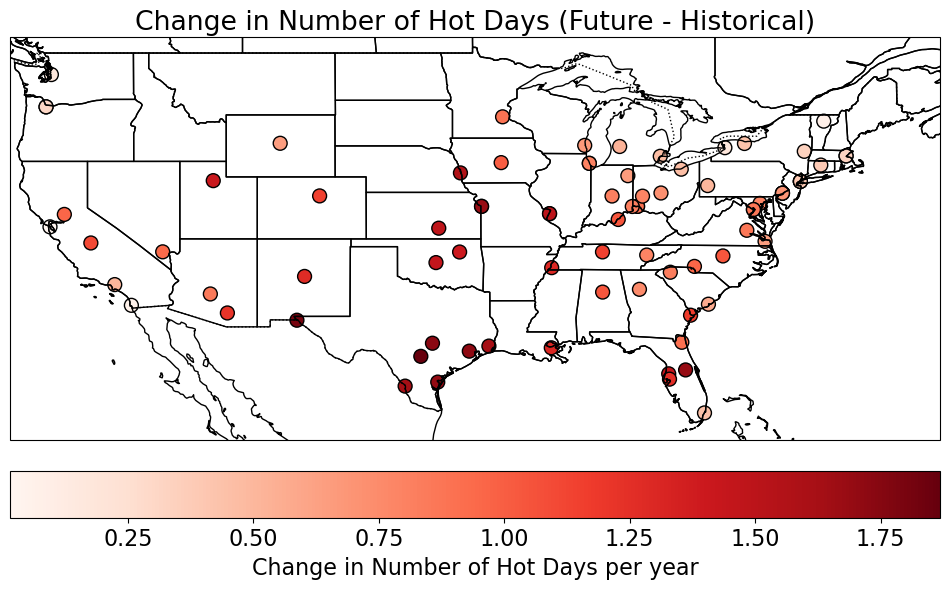

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the change in the number of hot days
df_nodes['hot_days_change_py'] = df_nodes['hot_days_future_py'] - df_nodes['hot_days_hist_py']

# Create a spatial plot of the hot days change
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on the Contiguous United States
ax.set_extent([-125, -65, 24, 50], crs=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-')

# Plot data points
scatter = ax.scatter(df_nodes['longitude'], df_nodes['latitude'], c=df_nodes['hot_days_change_py'], cmap='Reds', s=100, edgecolor='k', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Change in Number of Hot Days per year')

# Add titles and labels
plt.title('Change in Number of Hot Days (Future - Historical)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

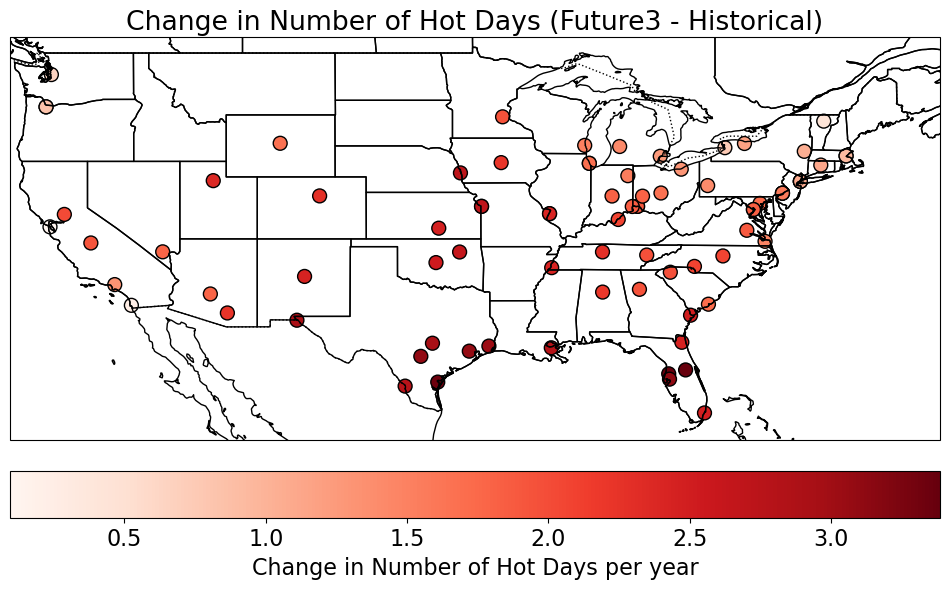

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the change in the number of hot days
df_nodes['hot_days_change3_py'] = df_nodes['hot_days_future3_py'] - df_nodes['hot_days_hist_py']

# Create a spatial plot of the hot days change
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on the Contiguous United States
ax.set_extent([-125, -65, 24, 50], crs=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-')

# Plot data points
scatter = ax.scatter(df_nodes['longitude'], df_nodes['latitude'], c=df_nodes['hot_days_change3_py'], cmap='Reds', s=100, edgecolor='k', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Change in Number of Hot Days per year')

# Add titles and labels
plt.title('Change in Number of Hot Days (Future3 - Historical)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [ ]:
tasmax_values.sel(time=slice(None, '2020-12-31'))

In [ ]:
(tasmax_values > threshold_kelvin).sum()


# Hot days. daily

In [22]:
ds

<xarray.Dataset>
Dimensions:  (lon: 944, lat: 474, time: 55152)
Coordinates:
  * lon      (lon) float32 234.5 234.6 234.7 234.7 ... 293.3 293.3 293.4 293.5
  * lat      (lat) float32 23.91 23.97 24.03 24.09 ... 53.28 53.34 53.41 53.47
  * time     (time) object 1950-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(23741, 474, 944), meta=np.ndarray>
Attributes: (12/90)
    SIOCRD_netCDF_Version:               1.0
    title:                               LOCA statistically downscaled climat...
    history:                             2019-05-02T08:02:01Z ;rewrote data t...
    CCCma_model_hash:                    3dedf95315d603326fde4f5340dc0519d80d...
    CCCma_parent_runid:                  rc3-pictrl
    CCCma_pycmor_hash:                   33c30511acc319a98240633965a04ca99c26...
    ...                                  ...
    fname_coarse_obs:                    ../../training_data/LOCA2_training_2...
    fname_gcm_hist:                      ../../Models/CanESM5/0p5x0p5/r1i1p1f...
    fname_gcm_in:                        ../../Models/CanESM5/0p5x0p5/r1i1p1f...
    loca_post_ds_bc_id:                  $Id: loca_post_ds_bc.F90,v 1.38 2022...
    loca_post_ds_bc_source:              $Source: /home6/dwpierc2/src/mine/lo...
    LOCA2_version:                       v20220413

In [23]:
#file_pattern = '/Users/ud4/.esgf/CMIP6/*/CCCma/CanESM5/*/r1i1p1f1/day/tasmax/gn/v20190429/*.nc'
#ds_daily = xr.open_mfdataset(file_pattern)
ds_daily = ds.copy()

In [15]:
# Calculate Hot Day per year

list_hot_days_hist = []
list_hot_days_future = []
list_hot_days_future2 = []
list_hot_days_future3 = []
for idx in range(len(df_nodes)):
    lats = df_nodes['latitude'][idx]
    lons = df_nodes['longitude'][idx]
    # Set the threshold temperature (35°C to Kelvin)
    threshold_kelvin = 35 + 273.15  # 35°C to Kelvin
    # Extract tasmax values for the given lat, lon
    tasmax_values = ds_daily['tasmax'].sel(lat=lats, lon=lons, method='nearest')
    tasmax_values_hist = tasmax_values.sel(time=slice('1991-01-01', '2020-12-31'))
    tasmax_values_future= tasmax_values.sel(time=slice('2021-01-01', '2050-12-31'))
    tasmax_values_future2= tasmax_values.sel(time=slice('2051-01-01', '2080-12-31'))
    tasmax_values_future3= tasmax_values.sel(time=slice('2121-01-01', '2150-12-31'))
    # Calculate number of hot days exceeding the threshold
    hot_days_hist = np.sum(np.array(tasmax_values_hist)> threshold_kelvin)
    
    hot_days_future = np.sum(np.array(tasmax_values_future)> threshold_kelvin)
    hot_days_future2 = np.sum(np.array(tasmax_values_future2)> threshold_kelvin)
    hot_days_future3 = np.sum(np.array(tasmax_values_future3)> threshold_kelvin)
    
    #hot_days = np.sum(np.array(tasmax_values)> threshold_kelvin)
    #print(f"Number of hot days at latitude {lats}, longitude {lons}: {hot_days}")
    print(f"Number of hot days at latitude {lats}, longitude {lons} [Hist]: {hot_days_hist}")
    print(f"Number of hot days at latitude {lats}, longitude {lons} [Future]: {hot_days_future}")
    list_hot_days_hist.append(hot_days_hist)
    list_hot_days_future.append(hot_days_future)
    list_hot_days_future2.append(hot_days_future2)
    list_hot_days_future3.append(hot_days_future3)

Number of hot days at latitude 42.6511674, longitude 286.245032 [Hist]: 5
Number of hot days at latitude 42.6511674, longitude 286.245032 [Future]: 57
Number of hot days at latitude 33.7489924, longitude 275.6097356 [Hist]: 189
Number of hot days at latitude 33.7489924, longitude 275.6097356 [Future]: 554
Number of hot days at latitude 30.2711286, longitude 262.2563005 [Hist]: 1733
Number of hot days at latitude 30.2711286, longitude 262.2563005 [Future]: 3225
Number of hot days at latitude 39.2908816, longitude 283.38924099999997 [Hist]: 67
Number of hot days at latitude 39.2908816, longitude 283.38924099999997 [Future]: 255
Number of hot days at latitude 28.2968872, longitude 277.497723 [Hist]: 43
Number of hot days at latitude 28.2968872, longitude 277.497723 [Future]: 237
Number of hot days at latitude 30.0860459, longitude 265.8981539 [Hist]: 28
Number of hot days at latitude 30.0860459, longitude 265.8981539 [Future]: 187
Number of hot days at latitude 33.570499, longitude 273.23

In [22]:
df_nodes_daily = df_nodes.copy(deep=True)
df_nodes_daily ['hot_days_hist'] = list_hot_days_hist
df_nodes_daily ['hot_days_future'] = list_hot_days_future
df_nodes_daily ['hot_days_future2'] = list_hot_days_future2
df_nodes_daily ['hot_days_future3'] = list_hot_days_future3
df_nodes_daily.to_csv("LOCA2/hot_days_daily.csv")

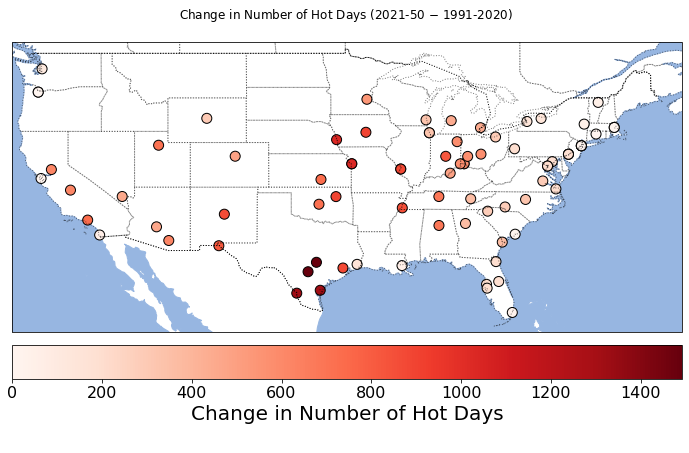

In [59]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the change in the number of hot days
df_nodes_daily['hot_days_change'] = df_nodes_daily['hot_days_future'] - df_nodes_daily['hot_days_hist']

# Create a spatial plot of the hot days change
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on the Contiguous United States
ax.set_extent([-125, -65, 24, 50], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':' , alpha =.5 )
ax.add_feature(cfeature.OCEAN, linestyle='-')

# Plot data points
scatter = ax.scatter(df_nodes_daily['longitude'], df_nodes_daily['latitude'], 
                     c=df_nodes_daily['hot_days_change'], cmap='Reds', 
                     s=100, edgecolor='k', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.03)
cbar.set_label('Change in Number of Hot Days\n', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Add titles and labels
plt.title('Change in Number of Hot Days (2021-50 $-$ 1991-2020) \n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
#fig.savefig( f'plots/Change_HotDays_2021.pdf',bbox_inches='tight')
#fig.savefig( f'plots/Change_HotDays_2021.png',bbox_inches='tight')

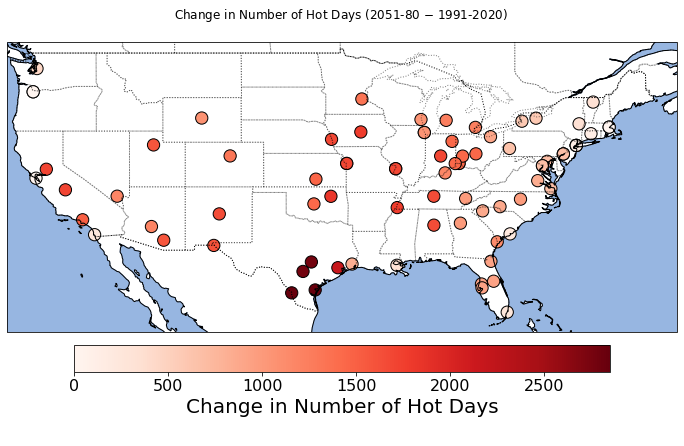

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the change in the number of hot days
df_nodes_daily['hot_days_change2'] = df_nodes_daily['hot_days_future2'] - df_nodes_daily['hot_days_hist']

# Create a spatial plot of the hot days change
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on the Contiguous United States
ax.set_extent([-125, -65, 24, 50], crs=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':' , alpha =.5 )
ax.add_feature(cfeature.OCEAN, linestyle='-')

# Plot data points
scatter = ax.scatter(df_nodes_daily['longitude'], df_nodes_daily['latitude'], 
                     c=df_nodes_daily['hot_days_change2'], cmap='Reds', 
                     s=150, edgecolor='k', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.03, shrink =0.8)
cbar.set_label('Change in Number of Hot Days\n', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Add titles and labels
plt.title('Change in Number of Hot Days (2051-80 $-$ 1991-2020) \n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#fig.savefig( f'plots/Change_HotDays_2051.pdf',bbox_inches='tight')
#fig.savefig( f'plots/Change_HotDays_2051.png',bbox_inches='tight')

plt.show()

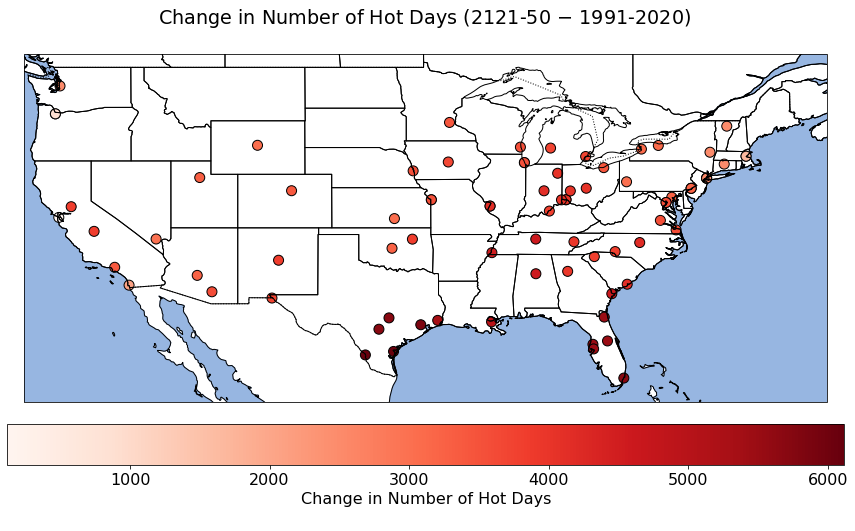

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the change in the number of hot days
df_nodes_daily['hot_days_change3'] = df_nodes_daily['hot_days_future3'] - df_nodes_daily['hot_days_hist']

# Create a spatial plot of the hot days change
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on the Contiguous United States
ax.set_extent([-125, -65, 24, 50], crs=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-')
ax.add_feature(cfeature.OCEAN, linestyle='-')

# Plot data points
scatter = ax.scatter(df_nodes_daily['longitude'], df_nodes_daily['latitude'], 
                     c=df_nodes_daily['hot_days_change3'], cmap='Reds', 
                     s=100, edgecolor='k', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Change in Number of Hot Days\n', fontsize=20)


# Add titles and labels
plt.title('Change in Number of Hot Days (2121-50 $-$ 1991-2020) \n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

fig.savefig( f'plots/Change_HotDays_2121.pdf',bbox_inches='tight')
fig.savefig( f'plots/Change_HotDays_2121.png',bbox_inches='tight')

plt.show()

In [56]:
# updating the existing dataframe
df_nodes_daily ['hot_days_hist'] = list_hot_days_hist
df_nodes_daily ['hot_days_future'] = list_hot_days_future
df_nodes_daily ['hot_days_future2'] = list_hot_days_future2
df_nodes_daily ['hot_days_future3'] = list_hot_days_future3
df_nodes_daily.to_csv("hot_days_daily.csv")

Object `cbar.set_extent` not found.


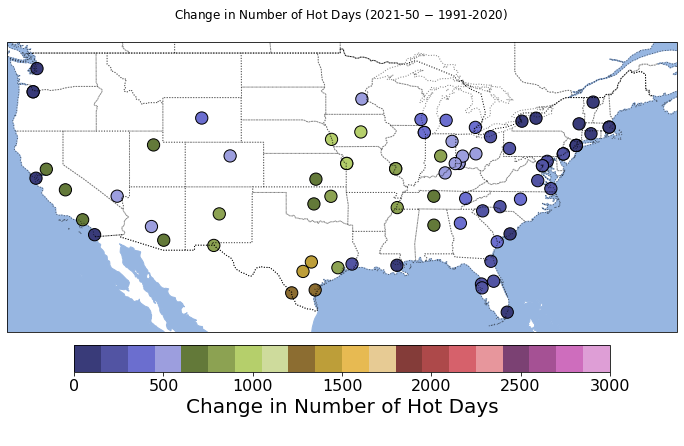

In [73]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the change in the number of hot days
df_nodes_daily['hot_days_change'] = df_nodes_daily['hot_days_future'] - df_nodes_daily['hot_days_hist']

# Create a spatial plot of the hot days change
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on the Contiguous United States
ax.set_extent([-125, -65, 24, 50], crs=ccrs.PlateCarree())

#ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':' , alpha =.5 )
ax.add_feature(cfeature.OCEAN, linestyle='-')

# Plot data points
vmin_val =0; vmax_val = 3000
scatter = ax.scatter(df_nodes_daily['longitude'], df_nodes_daily['latitude'], 
                     c=df_nodes_daily['hot_days_change'], cmap='tab20b', 
                     s=150, edgecolor='k', transform=ccrs.PlateCarree(),
                    vmin=vmin_val, vmax = vmax_val)


# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.03, shrink = 0.8)
cbar.set_label('Change in Number of Hot Days\n', fontsize=20)
cbar.ax.tick_params(labelsize=16)
cbar.set_extent?

# Add titles and labels
plt.title('Change in Number of Hot Days (2021-50 $-$ 1991-2020) \n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
fig.savefig( f'plots/Change_HotDays_2021_New.pdf',bbox_inches='tight')
fig.savefig( f'plots/Change_HotDays_2021_New.png',bbox_inches='tight')

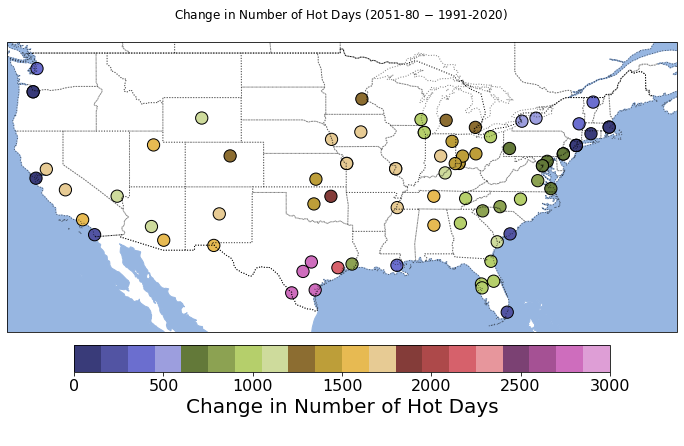

In [74]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Calculate the change in the number of hot days
df_nodes_daily['hot_days_change2'] = df_nodes_daily['hot_days_future2'] - df_nodes_daily['hot_days_hist']

# Create a spatial plot of the hot days change
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to focus on the Contiguous United States
ax.set_extent([-125, -65, 24, 50], crs=ccrs.PlateCarree())


ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':' , alpha =.5 )
ax.add_feature(cfeature.OCEAN, linestyle='-')

# Plot data points
vmin_val =0; vmax_val = 3000
scatter = ax.scatter(df_nodes_daily['longitude'], df_nodes_daily['latitude'], 
                     c=df_nodes_daily['hot_days_change2'], cmap='tab20b', 
                     s=150, edgecolor='k', transform=ccrs.PlateCarree(),
                    vmin=vmin_val, vmax = vmax_val)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.03, shrink = 0.8)
cbar.set_label('Change in Number of Hot Days\n', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Add titles and labels
plt.title('Change in Number of Hot Days (2051-80 $-$ 1991-2020) \n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

fig.savefig( f'plots/Change_HotDays_2051_New.pdf',bbox_inches='tight')
fig.savefig( f'plots/Change_HotDays_2051_New.png',bbox_inches='tight')

plt.show()

In [51]:
df_nodes_daily

,dms_orig_string,dms_orig_coordinates,longitude,latitude,hot_days_hist,hot_days_future,hot_days_future2,hot_days_future3,hot_days_change,hot_days_change2
0,Albany NY CFS Area,"(-73.754968, 42.6511674)",286.245032,42.651167,5,57,342,2497,52,337
1,Atlanta GA,"(-84.3902644, 33.7489924)",275.609736,33.748992,189,554,1186,4143,365,997
2,Austin TX,"(-97.7436995, 30.2711286)",262.256301,30.271129,1733,3225,4508,7433,1492,2775
3,Baltimore MD,"(-76.610759, 39.2908816)",283.389241,39.290882,67,255,735,3294,188,668
4,Baton Rouge LA,"(-82.502277, 28.2968872)",277.497723,28.296887,43,237,969,5544,194,926
...,...,...,...,...,...,...,...,...,...,...
77,Virginia Beach-Norfolk VA-NC (VA Part),"(-76.2863999, 36.8448348)",283.713600,36.844835,80,283,763,3686,203,683
78,Washington DC-VA-MD-WV (MD Part),"(-77.0365427, 38.8950368)",282.963457,38.895037,80,283,763,3686,203,683
79,Washington DC-VA-MD-WV (VA Part),"(-77.0365427, 38.8950368)",282.963457,38.895037,80,283,763,3686,203,683
80,Wichita KS,"(-97.3375448, 37.6922361)",262.662455,37.692236,3417,4146,4877,6447,729,1460
